# Assignment 2
## simple linear regression


exercise 1
* draw a scatter plot for the data mentioned for given attributes.

exercise 2
* perform data pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# reading data

# todo : change in price value

d = pd.read_csv('E:\LABS\data_set\Bengaluru_House_Data.csv', sep=",")
df = pd.DataFrame(d[['total_sqft','price']])


# Define a function to clean the 'total_sqft' column
def clean_sqft(x):
    if '-' in x:
        tokens = x.split('-')
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return np.nan

# Apply the cleaning function to the 'total_sqft' column
df['total_sqft'] = df['total_sqft'].apply(clean_sqft)

# Convert the 'total_sqft' column to numeric data type
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors="coerce")

# Drop rows with NaN values in the 'total_sqft' column
df.dropna(subset=['total_sqft'], inplace=True)

normalized_df = (df - df.mean()) / df.std()
normalized_df

,total_sqft,price
0,-0.406674,-0.492275
1,0.840091,0.050623
2,-0.096597,-0.338455
3,-0.031191,-0.117083
4,-0.290395,-0.412246
...,...,...
13315,1.528880,0.795237
13316,1.647581,1.928930
13317,-0.338037,-0.351872
13318,2.526938,2.519256


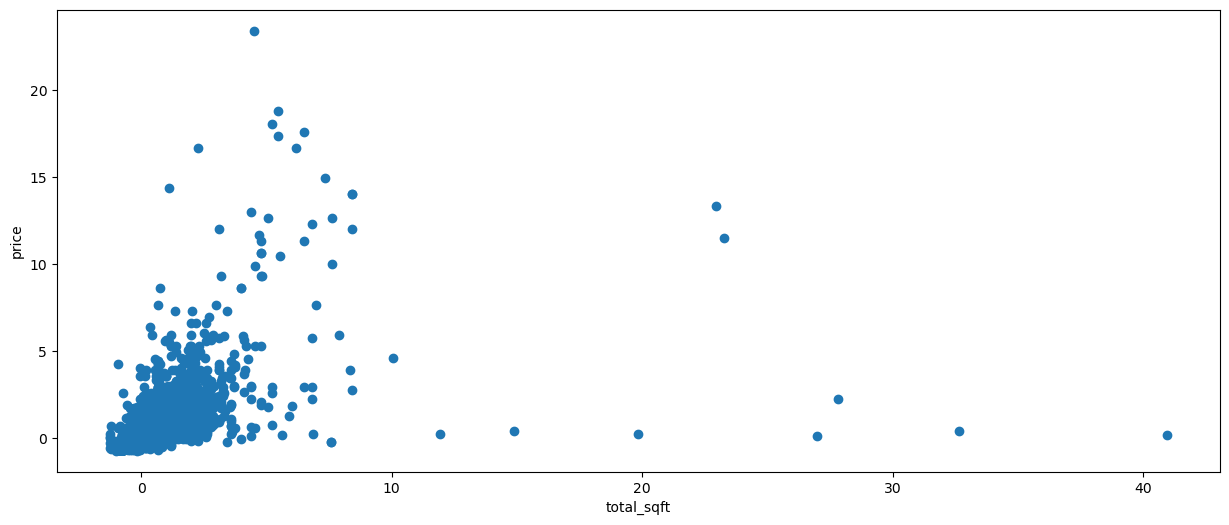

In [32]:
plt.scatter(normalized_df['total_sqft'], normalized_df['price'])
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

In [9]:
x = normalized_df['total_sqft'].values
y = normalized_df['price'].values

In [25]:
Theta_1 = 0
Theta_0 = 0

L = 0.001
epochs = 1000

n = float(len(x))

for i in range(epochs):
    y_pred = Theta_1*x + Theta_0
    d_theta_1 = (-2/n) * sum(x * (y - y_pred))
    d_theta_0 = (-2/n) * sum(y - y_pred)
    Theta_1 = Theta_1 - L * d_theta_1
    Theta_0 = Theta_0 - L * d_theta_0

print(Theta_1, Theta_0)

0.49780982315830247 4.607413842745592e-17


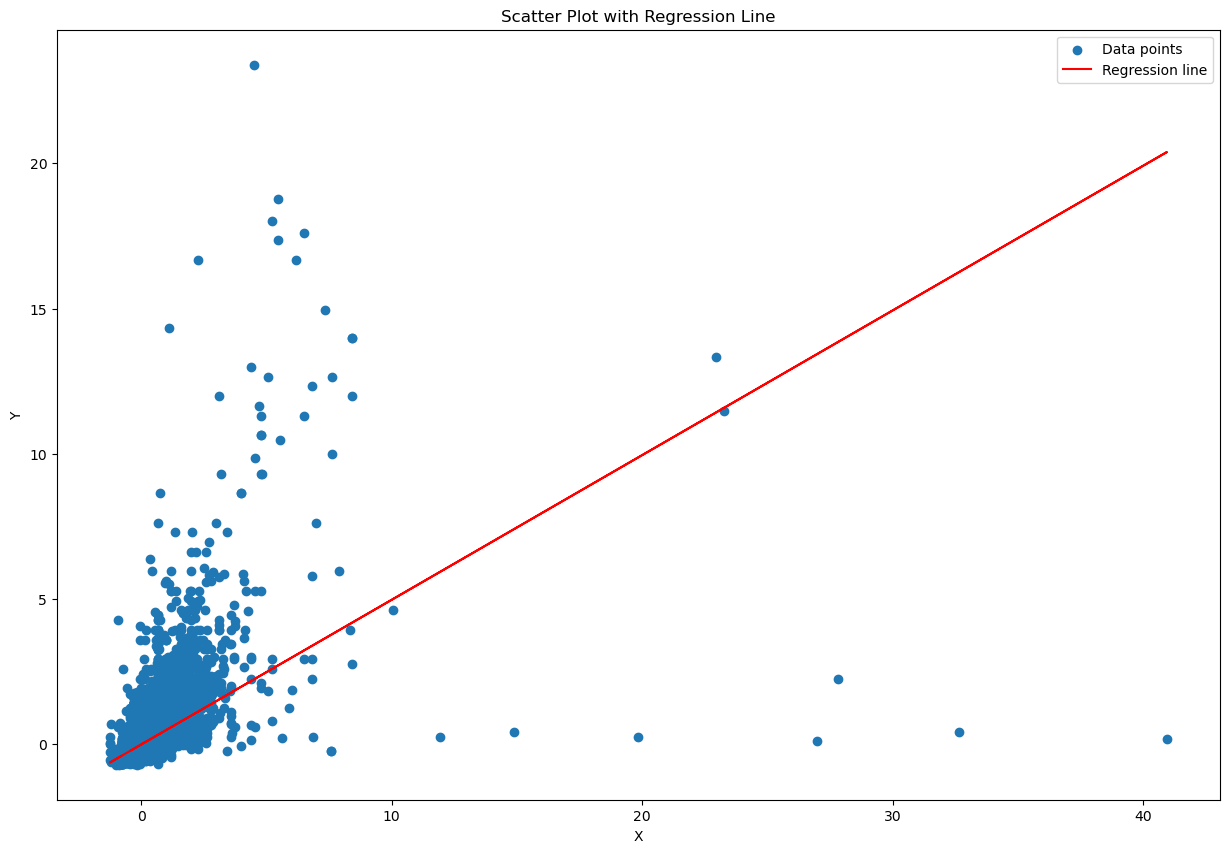

In [30]:
regression_line = Theta_1 * x + Theta_0

# Scatter plot
plt.scatter(x, y, label='Data points')
plt.plot(x, regression_line, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Regression Line')
plt.legend()
# plt.rcParams['figure.figsize'] = [15, 10]
plt.show()